# Dogs vs Cats Dataset
**Classification of cats and dogs using convnets.**

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). 

Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

## 1. Download and move the images 

After downloading and uncompressing it, create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [2]:
import os
import shutil

In [3]:
original_dataset_dir = 'D:/Deep Learning With Python/Chapter 5/catsvsdogs/train'

In [11]:
base_dir = 'D:/Deep Learning With Python/Chapter 5/catsvsdogs/cats_and_dogs_small'
if not os.path.exists(base_dir): os.mkdir(base_dir)  

Directories for training, validation and testing.

In [12]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir) 

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir) 

Create the respective directories.

In [13]:
# Directory with cat and dog training pictures.
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir): os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir): os.mkdir(train_dogs_dir)

# Directory with cat and dog validation pictures.
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir): os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir): os.mkdir(validation_dogs_dir)

# Directory with cat and dog test pictures.
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir): os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir): os.mkdir(test_dogs_dir)

Move the training, testing and validation pictures.

In [14]:
# Copy the first 1000 images to train_cats_dir 
for fname in ['cat.{}.jpg'.format(i) for i in range(1000)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy the next 500 to validation_cats_dir
for fname in ['cat.{}.jpg'.format(i) for i in range(1000,1500)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy the next 500 to test_cats_dir
for fname in ['cat.{}.jpg'.format(i) for i in range(1500,2000)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Repeat for dogs
for fname in ['dog.{}.jpg'.format(i) for i in range(1000)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy the next 500 to validation_dogs_dir
for fname in ['dog.{}.jpg'.format(i) for i in range(1000,1500)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy the next 500 to test_dogs_dir
for fname in ['dog.{}.jpg'.format(i) for i in range(1500,2000)]:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Confirm if images have been moved successfully.

In [15]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 2. Build the Model

**Architecture**
* Input shape: 150x150
* 3 conv and max-pooling layers, _relu_ activation
* 1 densely connected layer with 512 hidden units, at the top of the network, _relu_ activation
* 1 densely connected layer with 1 hidden unit, _softmax_ activation

In [17]:
from keras import models
from keras import layers
from keras import activations
from keras import optimizers
from keras import losses
from keras import metrics

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation=activations.relu, input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation=activations.relu))
model.add(layers.Dense(1, activation=activations.sigmoid))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [20]:
model.compile(optimizer=optimizers.rmsprop(lr=1e-4), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## 3.  Data Preprocessing

1) Read the picture files.

2) Decode the JPEG content to RGB grids of pixels.

3) Convert these into floating-point tensors.

4) Rescale the pixel values (between 0 and 255) to the [0, 1] interval. 

We will use the class _ImageDataGenerator_, which lets us quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


## 4. Fit the model

In [25]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6902 - binary_accuracy: 0.5370 - val_loss: 0.6730 - val_binary_accuracy: 0.6110
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6595 - binary_accuracy: 0.6150 - val_loss: 0.6389 - val_binary_accuracy: 0.6330
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6096 - binary_accuracy: 0.6590 - val_loss: 0.6475 - val_binary_accuracy: 0.6210
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5778 - binary_accuracy: 0.6915 - val_loss: 0.6240 - val_binary_accuracy: 0.6460
Epoch 5/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5392 - binary_accuracy: 0.7365 - val_loss: 0.5951 - val_binary_accuracy: 0.6880
Epoch 6/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5118 - binary_accuracy: 0.7515 - val_loss: 0.5755 - val_binary_accuracy: 0.6830
Epoch 7/30
100/100 [==============================] - 8s

### Validation Accuracy: 72.10%

Save the model.

In [26]:
model.save('cats_and_dogs_small_1.h5')

## 5. Plot the accuracy and validation loss

In [27]:
import matplotlib.pyplot as plt

In [28]:
history.history.keys()

dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])

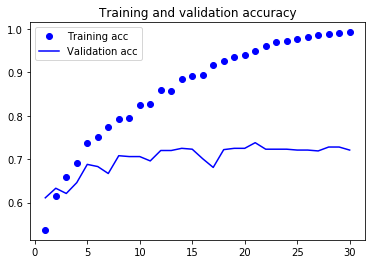

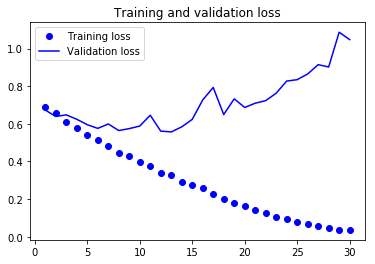

In [29]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As seen from he graphs, the validation loss increases sharply at higher epochs. This is due to overfitting. 

We will try data augmentation to generalize better.

## 6. Data Augmentation

This can be done by configuring a number of random transformations to be performed on the images read by the _ImageDataGenerator_ instance.

In [30]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

Here's an illustration of data augmentation.

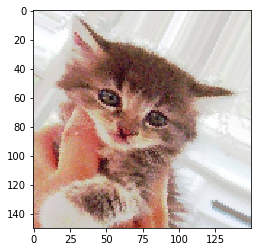

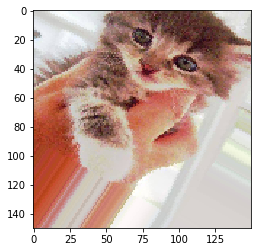

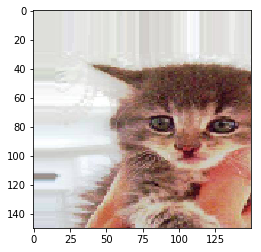

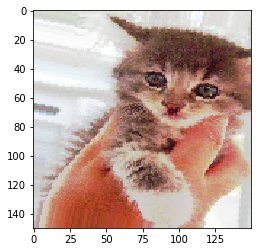

In [31]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# pick a random image to augment
img_path = fnames[3]

# Load the image  after resizing to 150x150
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

# Convert the image to numpy array of size (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Let's create a new network with dropout layers and use data augmentation to reduce overfitting.

**Architecture**
* Input shape: 150x150
* 3 conv and max-pooling layers, _relu_ activation
* 1 dropout layer, with dropout rate set to 0.5
* 1 densely connected layer with 512 hidden units, at the top of the network, _relu_ activation
* 1 densely connected layer with 1 hidden unit, _softmax_ activation

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation=activations.relu, input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation=activations.relu))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation=activations.relu))
model.add(layers.Dense(1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.rmsprop(lr=1e-4), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Data Augmentation:

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Note that we do **not** augment the validation data.

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [36]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [40]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=50, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/50
100/100 [==============================] - 24s 243ms/step - loss: 0.5452 - binary_accuracy: 0.7291 - val_loss: 0.5168 - val_binary_accuracy: 0.7386
Epoch 2/50
100/100 [==============================] - 22s 222ms/step - loss: 0.5478 - binary_accuracy: 0.7078 - val_loss: 0.5468 - val_binary_accuracy: 0.7191
Epoch 3/50
100/100 [==============================] - 22s 217ms/step - loss: 0.5395 - binary_accuracy: 0.7250 - val_loss: 0.5450 - val_binary_accuracy: 0.7107
Epoch 4/50
100/100 [==============================] - 22s 221ms/step - loss: 0.5206 - binary_accuracy: 0.7281 - val_loss: 0.5180 - val_binary_accuracy: 0.7339
Epoch 5/50
100/100 [==============================] - 23s 231ms/step - loss: 0.5271 - binary_accuracy: 0.7281 - val_loss: 0.4983 - val_binary_accuracy: 0.7500
Epoch 6/50
100/100 [==============================] - 25s 248ms/step - loss: 0.5306 - binary_accuracy: 0.7356 - val_loss: 0.5031 - val_binary_accuracy: 0.7397
Epoch 7/50
100/100 [==========================

### Validation accuracy with data augmentation: 81.44%

In [41]:
model.save('cats_and_dogs_small_2.h5')

Plotting the accuracy and validation loss curves.

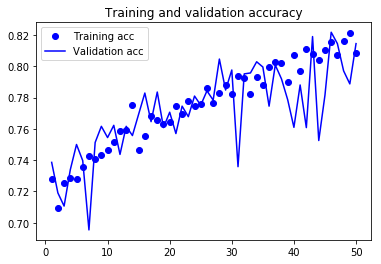

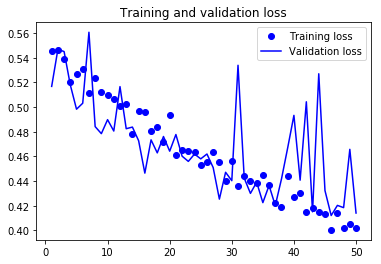

In [42]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 7. Using a pretrained network to perform feature extraction

Let's use the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog
images, and then train a dogs-versus-cats classifier on top of these features.

In [43]:
from keras.applications import VGG16

Use only the convolutional part of the VGG16 model.

In [44]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 53s 1us/step


In [45]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are 2 ways to proceed.

**FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION**:

Running the convolutional base over the dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, but this technique won’t allow you to use data augmentation.

In [50]:
import numpy as np

In [51]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [52]:
def extract_features(directory, sample_count):
    # To store the newly extracted features; shape mirrors the last layer of VGG16
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    
    # To store the labels
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        # Use the conv_base to predict for each batch 
        features_batch = conv_base.predict(inputs_batch)
        
        # Store the extracted features
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        
        # Break after every image has been seen once
        if i * batch_size >= sample_count:
            break
    return features, labels

In [53]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). To feed them to a densely connected classifier, flatten them to (samples, 8192).

In [54]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

#### Build the model 

In [57]:
model = models.Sequential()
model.add(layers.Dense(256, activation=activations.relu, input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 695us/step - loss: 0.6369 - binary_accuracy: 0.6405 - val_loss: 0.4407 - val_binary_accuracy: 0.8280
Epoch 2/30
2000/2000 [==============================] - 1s 508us/step - loss: 0.4440 - binary_accuracy: 0.7810 - val_loss: 0.3579 - val_binary_accuracy: 0.8670
Epoch 3/30
2000/2000 [==============================] - 1s 504us/step - loss: 0.3690 - binary_accuracy: 0.8355 - val_loss: 0.3309 - val_binary_accuracy: 0.8620
Epoch 4/30
2000/2000 [==============================] - 1s 574us/step - loss: 0.3209 - binary_accuracy: 0.8640 - val_loss: 0.2996 - val_binary_accuracy: 0.8910
Epoch 5/30
2000/2000 [==============================] - 1s 509us/step - loss: 0.2859 - binary_accuracy: 0.8830 - val_loss: 0.2904 - val_binary_accuracy: 0.8810
Epoch 6/30
2000/2000 [==============================] - 1s 502us/step - loss: 0.2686 - binary_accuracy: 0.8970 - val_loss: 0.2710 - val_binary_accuracy:

### Validation accuracy with fast feature extraction and no data augmentation: 90%

In [58]:
model.save('cats_and_dogs_small_3.h5')

In [59]:
history.history.keys()

dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])

#### Plotting the accuracy and loss.

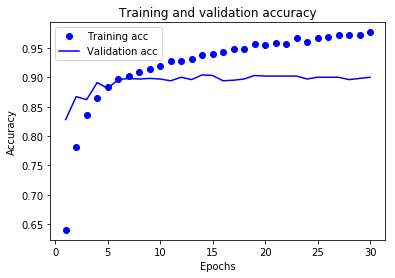

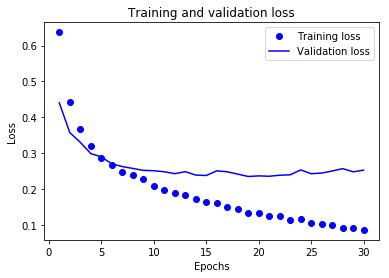

In [64]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

The graphs show that we are overfitting early, from about the 5th epoch.

**FEATURE EXTRACTION WITH DATA AUGMENTATION**

Extend the __conv_base__ model and running it end to end on the inputs.

Build the model.

In [80]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation=activations.sigmoid))

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#### Freeze the model 
Without freezing we would end up overriding the weight values of VGG16 model.

In [73]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 30


In [74]:
conv_base.trainable = False

In [75]:
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights after freezing the conv base: 4


Now there are only 4 weights: The weights of the 2 hidden layers and biases of the 2 hidden layers.

**Data Augmentation**

In [82]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [84]:
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=2e-5), metrics=[metrics.binary_accuracy])

In [85]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 25s 248ms/step - loss: 0.6662 - binary_accuracy: 0.6105 - val_loss: 0.4826 - val_binary_accuracy: 0.8130
Epoch 2/30
100/100 [==============================] - 24s 241ms/step - loss: 0.5582 - binary_accuracy: 0.7025 - val_loss: 0.4168 - val_binary_accuracy: 0.8450
Epoch 3/30
100/100 [==============================] - 24s 241ms/step - loss: 0.5117 - binary_accuracy: 0.7385 - val_loss: 0.3757 - val_binary_accuracy: 0.8630
Epoch 4/30
100/100 [==============================] - 24s 241ms/step - loss: 0.4737 - binary_accuracy: 0.7770 - val_loss: 0.3378 - val_binary_accuracy: 0.8810
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: 0.4573 - binary_accuracy: 0.7885 - val_loss: 0.3229 - val_binary_accuracy: 0.8800
Epoch 6/30
100/100 [==============================] - 24s 241ms/step - loss: 0.4339 - binary_accuracy: 0.8025 - val_loss: 0.3186 - val_binary_accuracy: 0.8800
Epoch 7/30
100/100 [==========================

## 8. Fine Tuning

Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model.

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Let's unfreeze block_5

In [87]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [89]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=[metrics.binary_accuracy])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 287ms/step - loss: 0.3030 - binary_accuracy: 0.8715 - val_loss: 0.2419 - val_binary_accuracy: 0.9010
Epoch 2/30
100/100 [==============================] - 28s 282ms/step - loss: 0.2699 - binary_accuracy: 0.8820 - val_loss: 0.2234 - val_binary_accuracy: 0.9220
Epoch 3/30
100/100 [==============================] - 28s 282ms/step - loss: 0.2678 - binary_accuracy: 0.8850 - val_loss: 0.2072 - val_binary_accuracy: 0.9200
Epoch 4/30
100/100 [==============================] - 28s 283ms/step - loss: 0.2460 - binary_accuracy: 0.8990 - val_loss: 0.1903 - val_binary_accuracy: 0.9260
Epoch 5/30
100/100 [==============================] - 28s 283ms/step - loss: 0.2291 - binary_accuracy: 0.9110 - val_loss: 0.2092 - val_binary_accuracy: 0.9160
Epoch 6/30
100/100 [==============================] - 28s 283ms/step - loss: 0.2199 - binary_accuracy: 0.9100 - val_loss: 0.1949 - val_binary_accuracy: 0.9240
Epoch 7/30
100/100 [==========================

### Validation accurracy with fine tuning and data augmentation: 93.5%

In [90]:
model.save('cats_and_dogs_small_4.h5')

Plotting validation loss and accuracy.

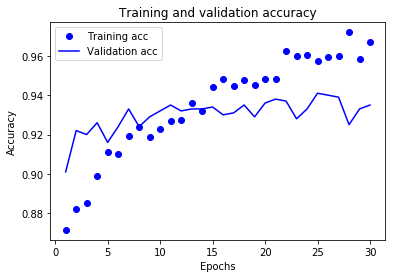

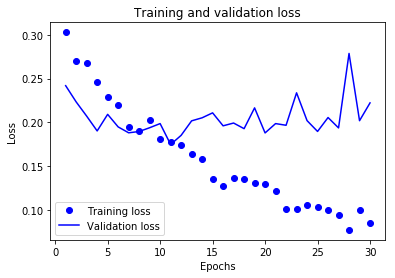

In [91]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 9. Evaluation on test set

Let's evaluate our model on the test set and see how it performs!

In [92]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [95]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

In [96]:
test_acc

0.9349999964237213

## Test set accuracy: 93.49%

___

**To improve accuracy further:**

1) Batch normalization

2) Use newer models for feature extraction, such as Xception. 

3) More dropout layers. 

4) Experiment with Adam instead of RMSProp.